<a href="https://colab.research.google.com/github/BabuShaik778/GradientBoost_in_ML/blob/main/Gradientboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   House_Size_sqft  200 non-null    int64  
 1   Num_Bedrooms     200 non-null    int64  
 2   Num_Bathrooms    200 non-null    int64  
 3   Location_Score   200 non-null    float64
 4   Age_of_House     200 non-null    int64  
 5   Price            200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB
None
       House_Size_sqft  Num_Bedrooms  Num_Bathrooms  Location_Score  \
count       200.000000    200.000000     200.000000      200.000000   
mean       1964.220000      2.445000       1.915000        5.522848   
std         862.299842      1.092218       0.831403        2.684693   
min         524.000000      1.000000       1.000000        1.087938   
25%        1266.500000      1.000000       1.000000        3.066217   
50%        1897.500000      2.000000       2.00

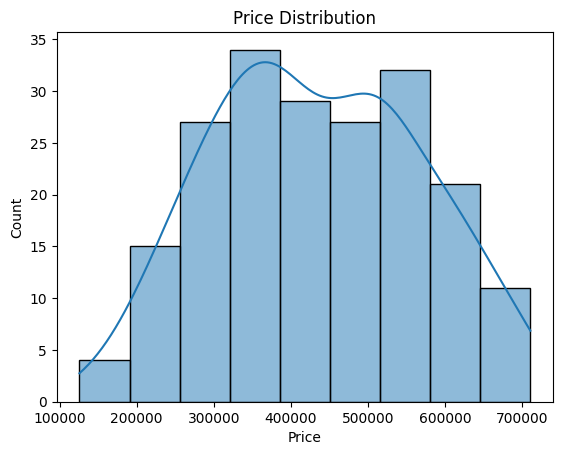

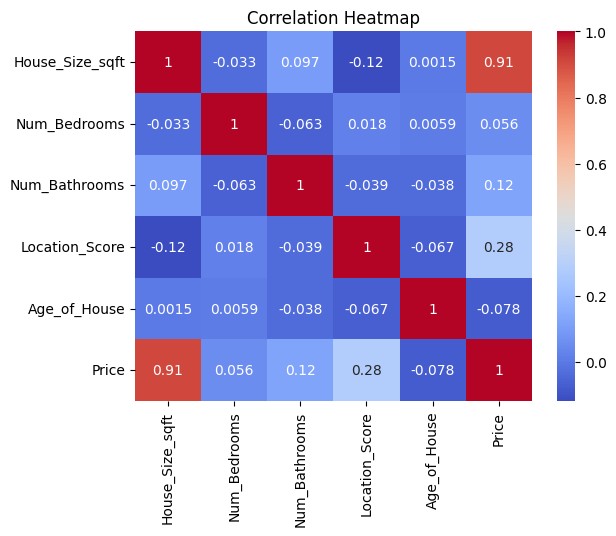

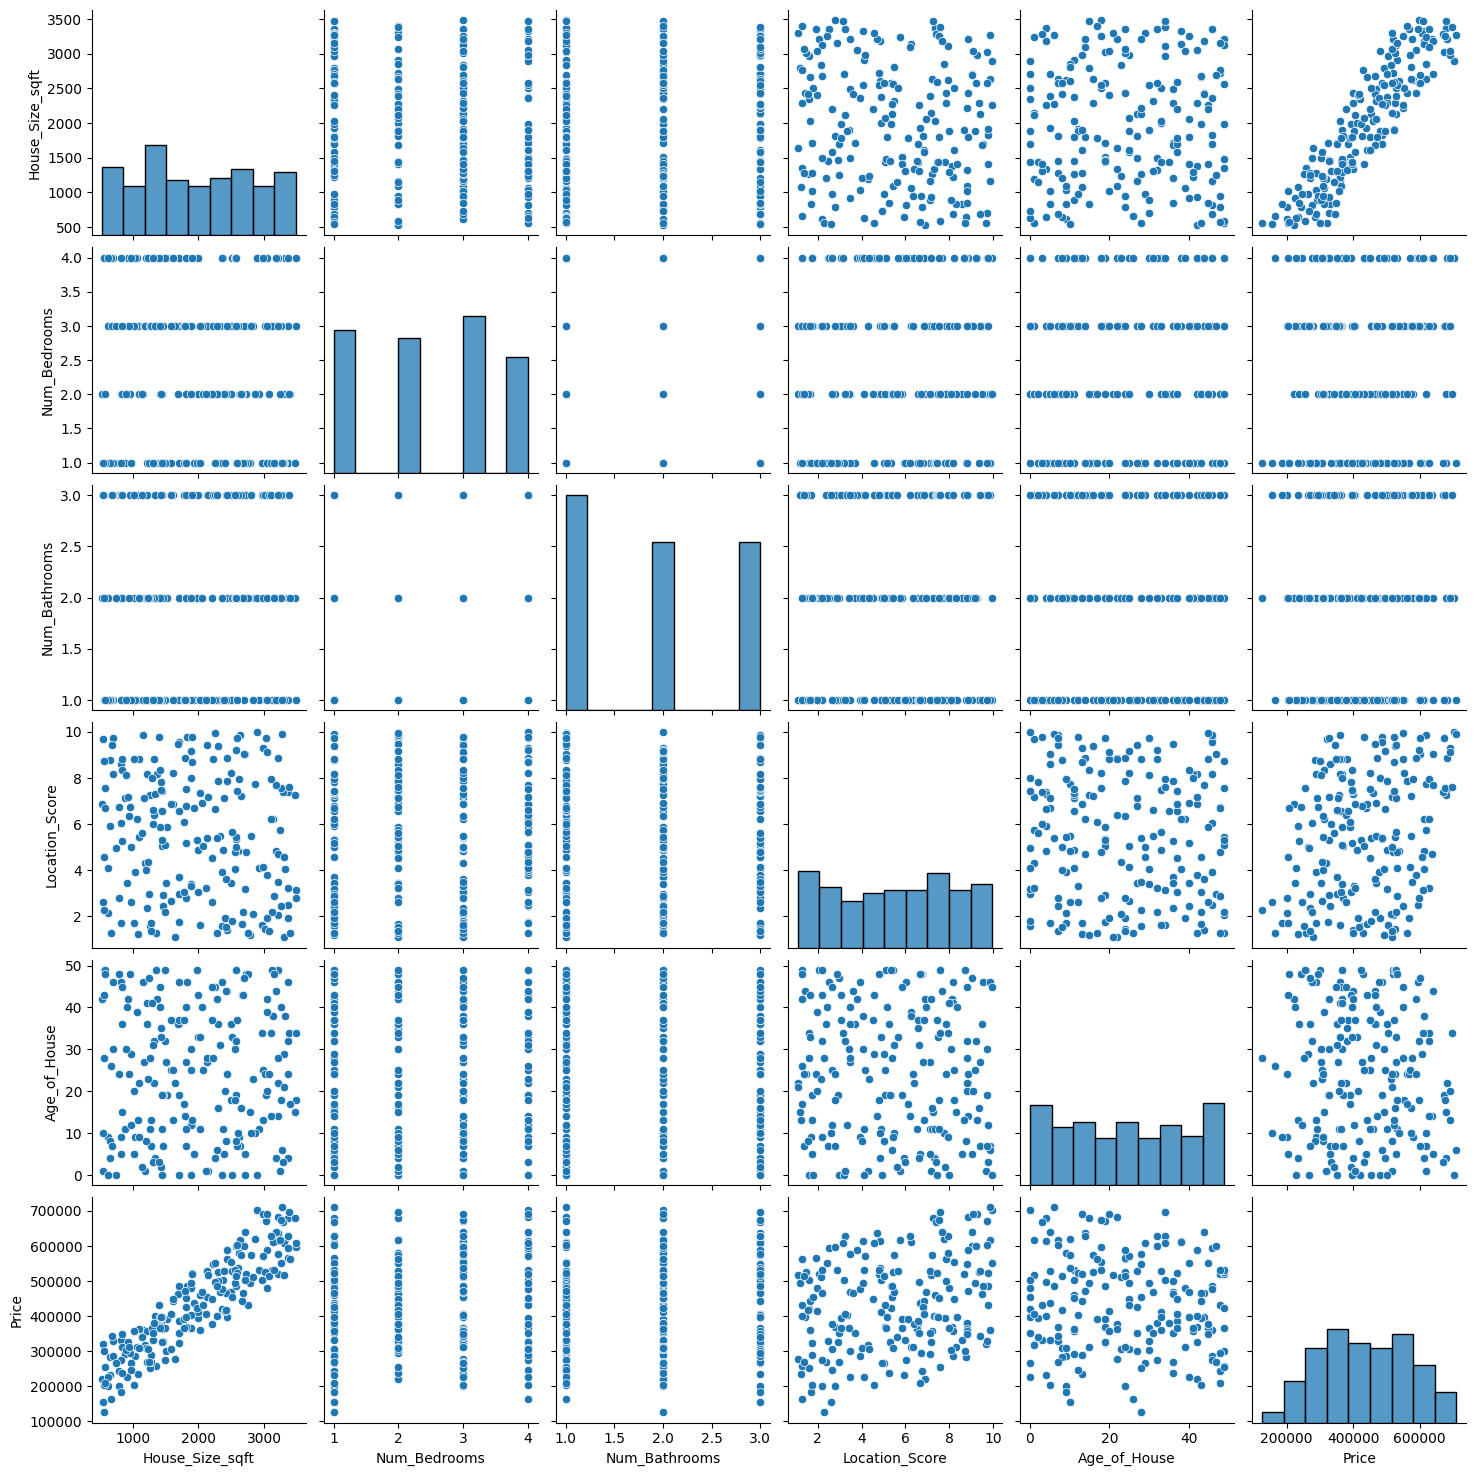

MAE: 18233.55
MSE: 456141600.68
RMSE: 21357.47
R² Score: 0.98


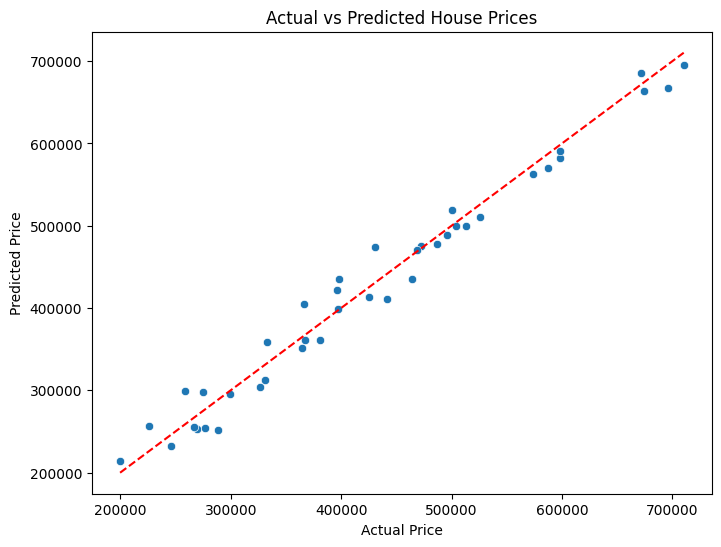

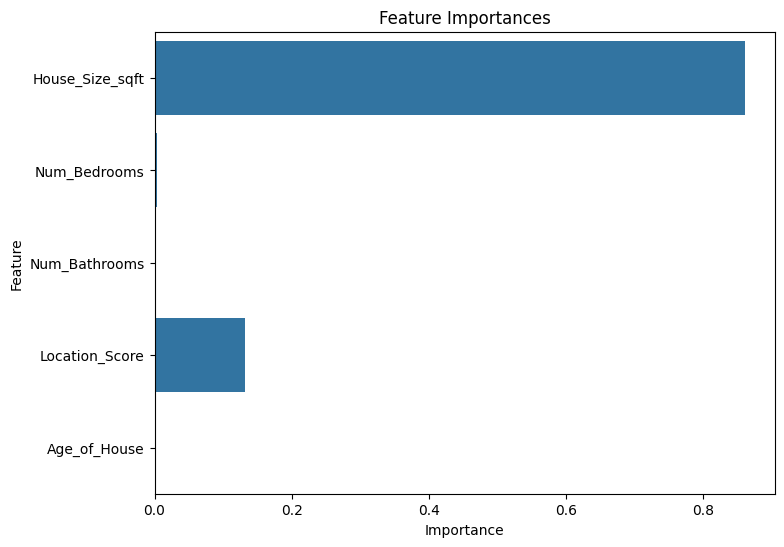

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
Tuned MAE: 15408.848382773047
Tuned RMSE: 18473.987241264553
Tuned R²: 0.9818255380144474


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv('gradientboost_dataset.csv')

# Display info and stats
print(df.info())
print(df.describe())
print(df.isnull().sum())

# Plot Price distribution
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

# Correlation heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Pairwise plots
sns.pairplot(df)
plt.show()


# Features and target
X = df[['House_Size_sqft', 'Num_Bedrooms', 'Num_Bathrooms', 'Location_Score', 'Age_of_House']]
y = df['Price']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


#  Train GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)


#  Evaluate Model

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


# Feature Importances

importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


# 8. Bonus: Hyperparameter Tuning

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Results from grid search
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Tuned MAE:", mean_absolute_error(y_test, y_pred_best))
print("Tuned RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Tuned R²:", r2_score(y_test, y_pred_best))
